<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html lorenz.do.txt  -->
This code is an example code that solves Newton's equations of motion with a given force and produces an output which in turn can be used to train a neural network

(1, 800, 3)


TypeError: plot() missing 1 required positional argument: 'ys'

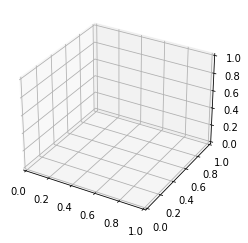

In [30]:
%matplotlib inline

# Common imports
import numpy as np
from scipy.integrate import odeint
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


dt =0.01; tfinal = 8; t = np.arange(0,tfinal, dt)
beta =8.0/3.0; rho = 28.0; sigma = 10.0

nninput = np.zeros((100*len(t),3))
nnoutput = np.zeros((100*len(t),3))


def lorenz_derivative(xyz, t0, sigma=sigma,beta=beta,rho=rho):
    x, y, z = xyz
    return [sigma*(x-y), x*(rho-z)-y, x*y-beta*z]

x0 = -15.0+30.0*np.random.random((1,3))
x_t = np.asarray([odeint(lorenz_derivative, x0_j, t) 
                  for x0_j in x0])
print(np.shape(x_t))



ax = plt.figure().add_subplot(projection='3d')
for i in range(100):
    ax.plot(x_t[i,:,:], lw=0.5)
    
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

#ax = plt.figure().add_subplot(projection='3d')
#ax.plot(x, y, z, label='Lorenz attractor curve')
#ax.legend()

